In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usedcarscatalog/cars.csv


In [3]:
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("/kaggle/input/usedcarscatalog/cars.csv")
dataset

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


# Eliminate Unexplainable or Excess Columns

In [5]:
columns_drop = dataset.copy()
columns_drop.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

We don't know what the feature_1-feature_9 corellate to. So for explainibility's sake we're going to exclude them.

Also, duration_listed is a column of data that would not be available to someone who was using this model to predict the value of the car they wanted to sell, so we'll drop that as well. 

In [6]:
columns_drop = columns_drop.loc[:, ['manufacturer_name', 'model_name', 'transmission', 'color', 
                                    'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas', 
                                    'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
                                    'drivetrain', 'price_usd', 'is_exchangeable', 'location_region']]
columns_drop

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,Минская обл.
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,Брестская обл.
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,Минская обл.
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,Брестская обл.


# Data Analysis
This will help us determine which variables will be of most interest to run our ML algorithms on. Not all variables will help us get the desired result

In [7]:
corr_matrix = columns_drop.copy()
corr_matrix = corr_matrix.corr()

corr_matrix

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable
odometer_value,1.000000,-0.488679,0.057786,0.105704,-0.189498,-0.421204,0.042342
year_produced,-0.488679,1.000000,-0.074686,0.005059,0.209231,0.705511,-0.057937
engine_has_gas,0.057786,-0.074686,1.000000,0.084579,-0.020667,-0.062528,0.018646
engine_capacity,0.105704,0.005059,0.084579,1.000000,-0.054583,0.296597,0.081636
has_warranty,-0.189498,0.209231,-0.020667,-0.054583,1.000000,0.285532,0.117775
price_usd,-0.421204,0.705511,-0.062528,0.296597,0.285532,1.000000,-0.000503
is_exchangeable,0.042342,-0.057937,0.018646,0.081636,0.117775,-0.000503,1.000000


My experience with cars tells me that Make and Model can be especially important in determining the value of a car in the used market. Lexus for example tend to fetch higher prices than BMWs in the US.

<BarContainer object of 55 artists>

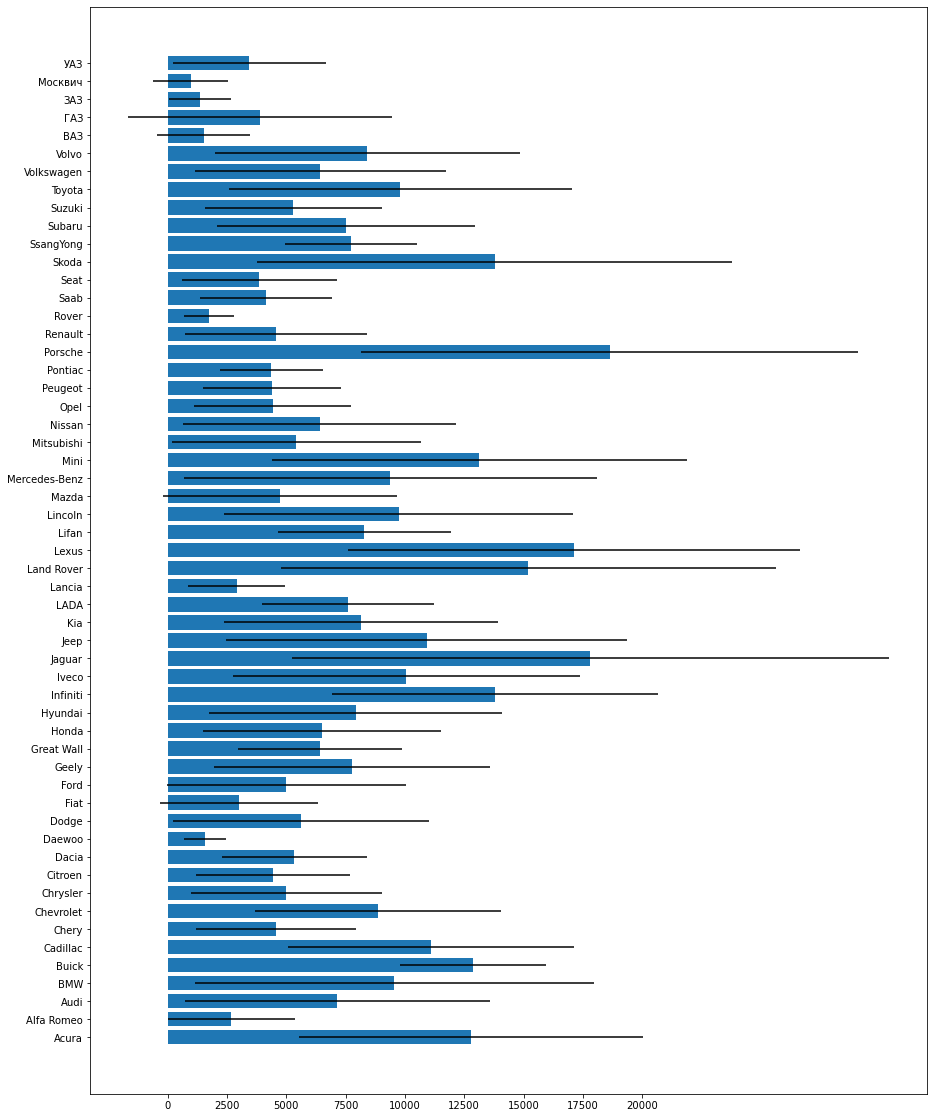

In [8]:
car_make_visualization = columns_drop.loc[:, ['manufacturer_name', 'price_usd']]
car_make_visualization_mean = car_make_visualization.groupby("manufacturer_name")['price_usd'].mean().reset_index()
error_bars = car_make_visualization.groupby("manufacturer_name")['price_usd'].std().reset_index()

plt.figure(figsize=(15, 20))
ax = plt.subplot()
ax.set_xticks(range(0, 22500, 2500))
plt.barh(car_make_visualization_mean['manufacturer_name'], car_make_visualization_mean['price_usd'], xerr= error_bars.iloc[:, 1])

In [9]:
brands = ['Acura', 'Alfa-Romeo', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chery',
       'Chevrolet', 'Chrysler', 'Citroen', 'Dacia', 'Daewoo', 'Dodge',
       'Fiat', 'Ford', 'Geely', 'Great-Wall', 'Honda', 'Hyundai',
       'Infiniti', 'Iveco', 'Jaguar', 'Jeep', 'Kia', 'Lada', 'Lancia',
       'Land-Rover', 'Lexus', 'Lifan', 'Lincoln', 'Mazda',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
       'Pontiac', 'Porsche', 'Renault', 'Rover', 'Saab', 'SEAT', 'Skoda',
       'SsangYong', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo',
       'Lada', 'GAZ', 'ZAZ', 'moskvich', 'UAZ']

import matplotlib.image as mpimg
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

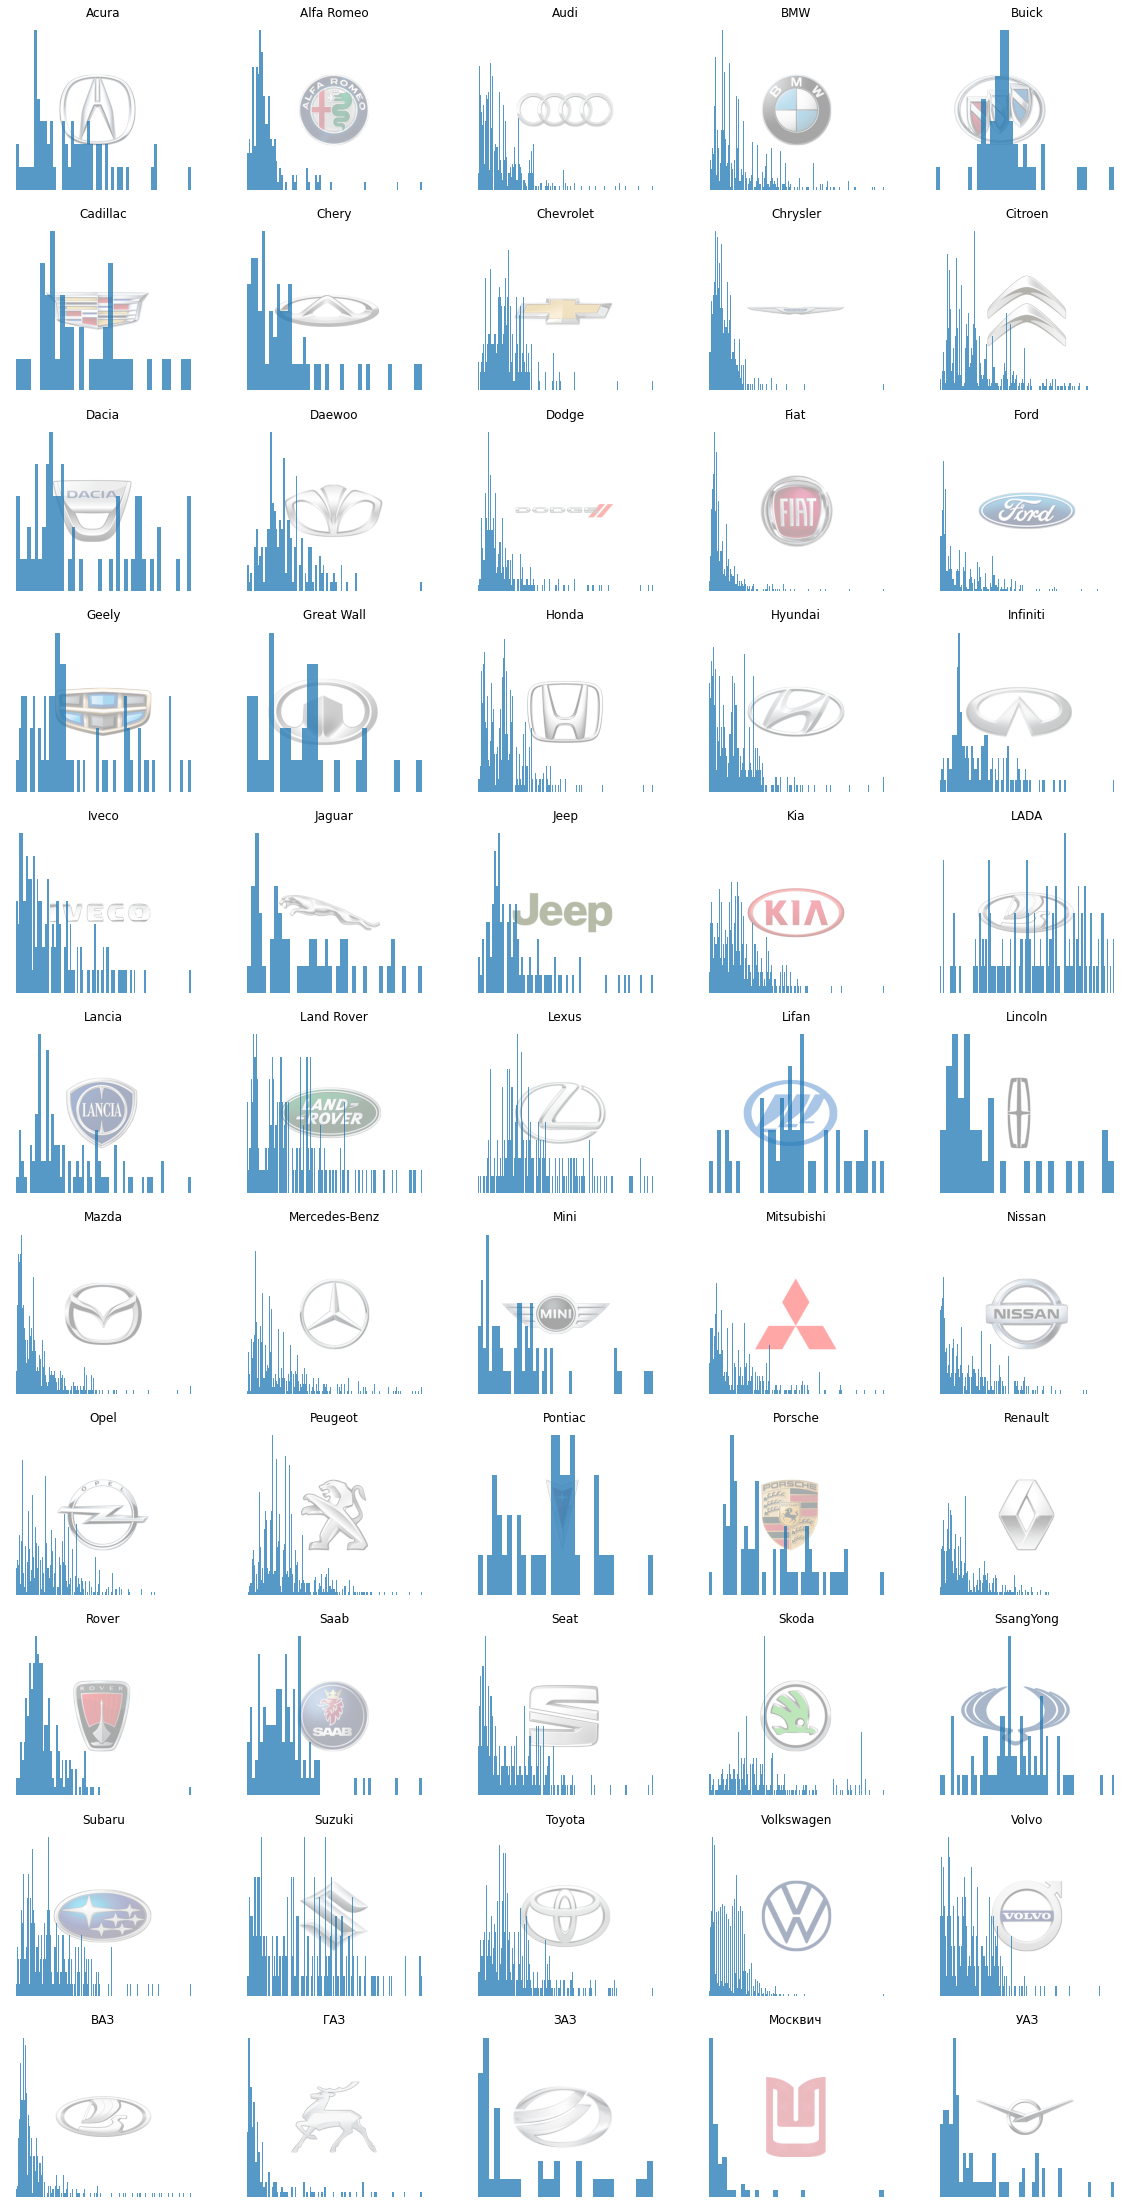

In [10]:
plt.figure(figsize=(20, 40), facecolor='white')
plt.title("Distribution of Prices for Used Cars in Belarus")

z = 0

for i in np.sort(car_make_visualization['manufacturer_name'].unique()):
    z+=1
    plt.subplot(11, 5, z)
    make_plot = car_make_visualization[car_make_visualization['manufacturer_name'] == i].sort_values(by='price_usd').reset_index()

    x_hist, y_hist = np.histogram(make_plot['price_usd'], bins=len(make_plot['price_usd'].unique()))
    
    try:
        img=mpimg.imread(f'https://www.carlogos.org/logo/{brands[z-1]}-logo.png')
    except:
        img=mpimg.imread(f'https://car-logos.com/images/lsm/{brands[z-1]}-logo.png')
    
    plt.imshow(img, origin='upper', alpha=0.35, aspect='auto', 
            extent=(make_plot['price_usd'].max()*0.2, make_plot['price_usd'].max()*0.8, 
                    x_hist.max()*0.25, x_hist.max()*0.75))
    
    plt.hist(make_plot['price_usd'], bins=len(make_plot['price_usd'].unique()), alpha=0.75)
    
    plt.axis("off")
    plt.title(i)

plt.show() 

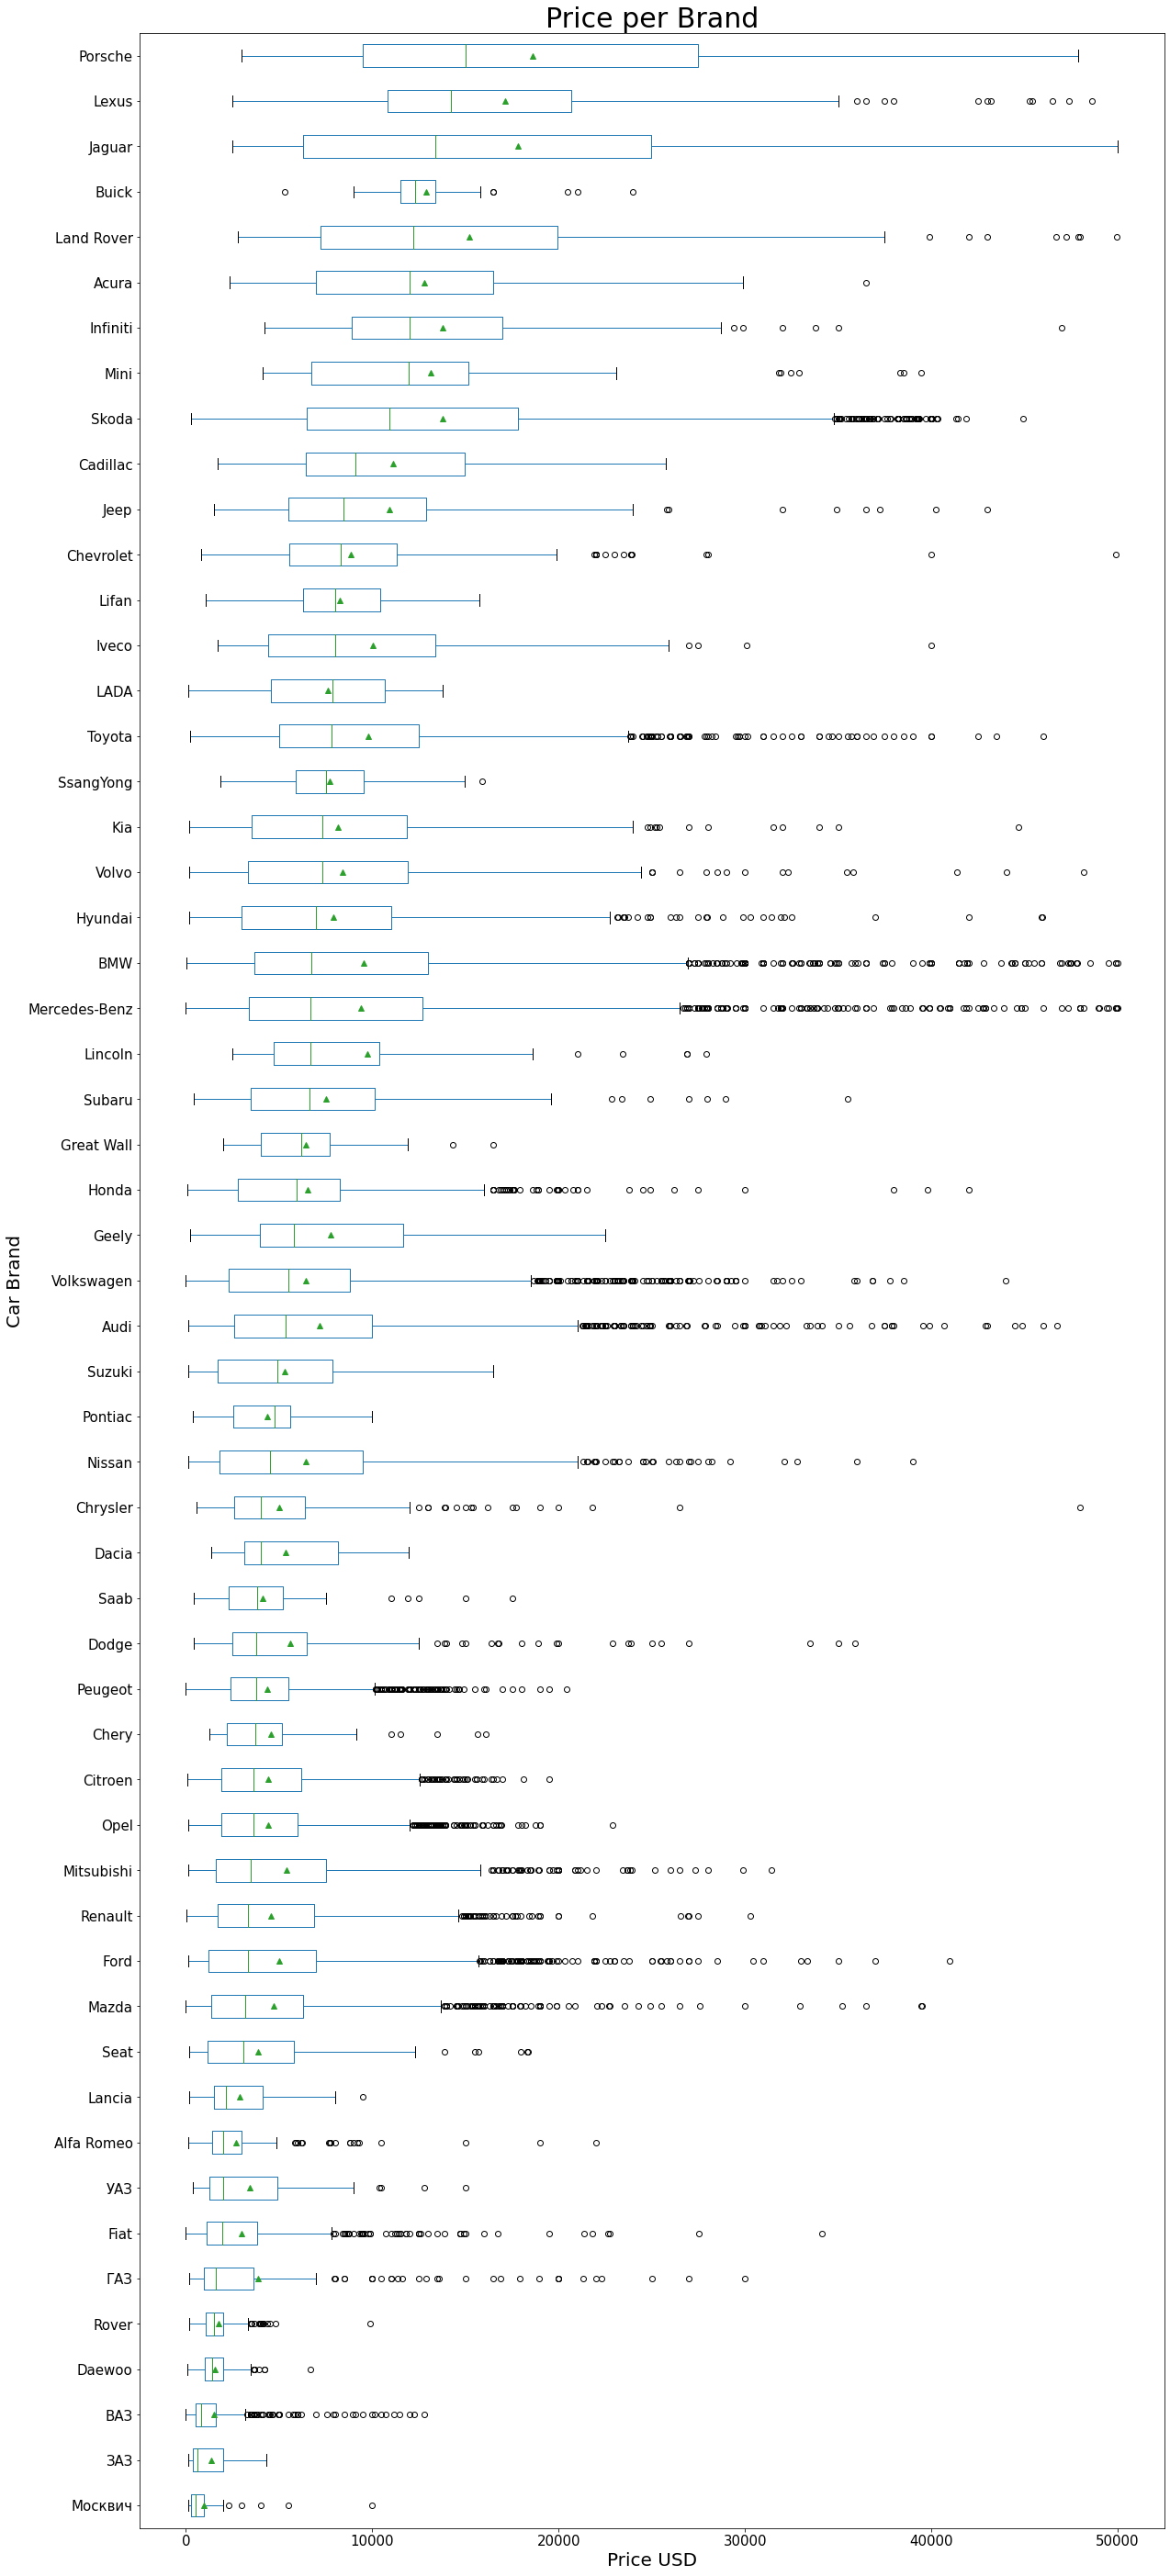

In [11]:
def boxplot_sorted(df, by, column, rot=0):

    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})

    meds = df2.median().sort_values()

    return df2[meds.index].boxplot(rot=rot, return_type="axes", vert=False, 
                                   figsize=(20, 50), fontsize=15, showmeans=True)

axes = boxplot_sorted(car_make_visualization, by = ['manufacturer_name'], column = 'price_usd')
axes.grid(False)
plt.xlabel('Price USD', fontsize=20)
plt.ylabel('Car Brand', fontsize=20)
plt.title('Price per Brand', fontsize=30)
plt.show()

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

ANOVA_test_columns = columns_drop.copy()
temp = columns_drop.copy()
temp = temp.loc[:, 'price_usd']
ANOVA_test_columns = ANOVA_test_columns.select_dtypes(include='object')
ANOVA_test_columns = pd.concat([ANOVA_test_columns, temp], axis=1)
ANOVA_test_columns

for i in ANOVA_test_columns.columns[0:-1]:
    mod = ols(f'price_usd ~ {i}', data=ANOVA_test_columns).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(aov_table, '\n')

                         sum_sq       df           F  PR(>F)
manufacturer_name  2.944511e+11     54.0  161.678028     0.0
Residual           1.297652e+12  38476.0         NaN     NaN 

                  sum_sq       df         F  PR(>F)
model_name  9.809978e+11   1117.0  53.76765     0.0
Residual    6.111057e+11  37413.0       NaN     NaN 

                    sum_sq       df             F  PR(>F)
transmission  3.613595e+11      1.0  11312.525507     0.0
Residual      1.230744e+12  38529.0           NaN     NaN 

                sum_sq       df           F  PR(>F)
color     1.703775e+11     11.0  419.641596     0.0
Residual  1.421726e+12  38519.0         NaN     NaN 

                   sum_sq       df           F         PR(>F)
engine_fuel  2.269599e+10      5.0  111.425853  2.655349e-117
Residual     1.569407e+12  38525.0         NaN            NaN 

                   sum_sq       df           F        PR(>F)
engine_type  1.275034e+10      2.0  155.521015  5.361182e-68
Residual     

In [13]:
import numpy as np
from statsmodels.multivariate.pca import PCA
x = np.random.randn(100)[:, None]
x = x + np.random.randn(100, 100)
pc = PCA(x)
pc

Principal Component Analysis(nobs: 100, nvar: 100, transformation: Standardize (Correlation), normalization: True, number of components: 100, SVD, id: 0x7f278c1b0290)

There are a lot of cars that have a listing price of $1.00. This is most likely inaccurate and these values will be dropped

In [14]:
row_drop = columns_drop.copy()
row_drop = row_drop[row_drop['price_usd'] > 100]

In [15]:
y = row_drop.copy()
y = y.loc[:, 'price_usd']

X = row_drop.copy()
X = X.drop(columns='price_usd')

## Impute Values

In [16]:
X.dropna(axis=1, inplace=True)

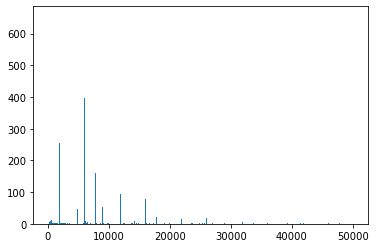

In [17]:
plt.hist(y, bins = 10000)
plt.show()

In [18]:
y.value_counts()

#plt.hist(y.value_counts())

1500.00     637
3500.00     568
2000.00     561
1000.00     552
2500.00     546
           ... 
3322.40       1
4540.00       1
12286.11      1
15128.52      1
789.00        1
Name: price_usd, Length: 2670, dtype: int64

## Label Encode

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in ['body_type', 'color', 'transmission', 'engine_fuel', 'engine_type', 'state', 'drivetrain', 'location_region']:
    X.loc[:,i] = le.fit_transform(X.loc[:,i])

## One Hot Encode

We're One Hot Encoding: Color, Make+Model, Location

In [20]:
ohe_table = X.copy()

ohe_table['make_model'] = ohe_table['manufacturer_name'] + ohe_table['model_name']
ohe_table.drop(columns=['model_name', 'manufacturer_name'], inplace=True)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [13])], remainder='passthrough')

ohe_table = np.array(ct.fit_transform(ohe_table))

## Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ohe_table, y, test_size=0.2, random_state=0)

## Scaling Variables

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.fit_transform(X_test)

# Modelling

Setting up the MAE output

In [23]:
from sklearn.metrics import mean_absolute_error

results = [['Model', 'MAE']]

## Support Vector Machine Regressor

In [ ]:
from sklearn.svm import SVR
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))

results.append(['Support Vector Machines', str(mean_absolute_error(y_pred, y_test))])

## Cat Boost Regressor

In [24]:
from catboost import CatBoostRegressor

cb_model = CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)

cb_model.fit(X_train, y_train,
             eval_set=(X_test, y_test),
             use_best_model=True,
             verbose=50)

0:	learn: 6168.5304125	test: 6265.8591638	best: 6265.8591638 (0)	total: 141ms	remaining: 1m 10s
50:	learn: 2743.7424778	test: 2814.2765396	best: 2814.2765396 (50)	total: 2.27s	remaining: 19.9s
100:	learn: 2523.2070297	test: 2626.1012925	best: 2626.1012925 (100)	total: 4.34s	remaining: 17.2s
150:	learn: 2424.3985899	test: 2558.5060674	best: 2558.5060674 (150)	total: 6.43s	remaining: 14.9s
200:	learn: 2346.0228143	test: 2503.0208166	best: 2503.0208166 (200)	total: 8.48s	remaining: 12.6s
250:	learn: 2273.6076214	test: 2455.4288198	best: 2455.4288198 (250)	total: 10.6s	remaining: 10.5s
300:	learn: 2207.6932650	test: 2409.2333307	best: 2409.2333307 (300)	total: 12.8s	remaining: 8.44s
350:	learn: 2154.5173464	test: 2374.9356174	best: 2374.9342017 (349)	total: 14.8s	remaining: 6.3s
400:	learn: 2103.2693616	test: 2341.2422267	best: 2341.2408170 (399)	total: 16.9s	remaining: 4.18s
450:	learn: 2058.8066618	test: 2310.9726039	best: 2310.9726039 (450)	total: 19s	remaining: 2.07s
499:	learn: 2019.1

In [25]:
y_pred = cb_model.predict(X_test)

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))

results.append(['CatBoost Regressor', str(mean_absolute_error(y_pred, y_test))])

MAE: 1395.5461346474838


## XG Boost Regressor

In [26]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

results.append(['XG Boost Regressor', str(mean_absolute_error(predictions, y_test))])

Mean Absolute Error: 1355.2163674381222


## Light GBM Regressor

In [43]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'RMSE'},
    'num_leaves': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

lb_model = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

[1]	valid_0's rmse: 6235.97
Training until validation scores don't improve for 5 rounds
[2]	valid_0's rmse: 5984.34
[3]	valid_0's rmse: 5750.55
[4]	valid_0's rmse: 5536.29
[5]	valid_0's rmse: 5383.59
[6]	valid_0's rmse: 5195.11
[7]	valid_0's rmse: 5007.84
[8]	valid_0's rmse: 4847.64
[9]	valid_0's rmse: 4696.19
[10]	valid_0's rmse: 4569.77
[11]	valid_0's rmse: 4463.55
[12]	valid_0's rmse: 4369.07
[13]	valid_0's rmse: 4281.12
[14]	valid_0's rmse: 4206.92
[15]	valid_0's rmse: 4131.52
[16]	valid_0's rmse: 4067.29
[17]	valid_0's rmse: 4021.5
[18]	valid_0's rmse: 3997.27
[19]	valid_0's rmse: 3958.33
[20]	valid_0's rmse: 3932.28
Did not meet early stopping. Best iteration is:
[20]	valid_0's rmse: 3932.28


In [44]:
y_pred = lb_model.predict(X_test, num_iteration=lb_model.best_iteration)

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))

results.append(['Light GBM', str(mean_absolute_error(y_pred, y_test))])


MAE: 2891.5718327995646


## Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

rndm_frst = RandomForestRegressor(n_estimators=500, random_state=0)

rndm_frst.fit(X_train, y_train)

y_pred = rndm_frst.predict(X_test)

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))

results.append(['Random Forest Regressor', str(mean_absolute_error(y_pred, y_test))])

MAE: 1200.0649391739837


## Artificial Neural Networks

In [ ]:
import tensorflow as tf
tf.__version__

ann = tf.keras.models.Sequential()

# Dense means that every input is connected to every neuron in the next layer
ann.add(tf.keras.layers.Dense(units=1185, activation="relu"))

ann.add(tf.keras.layers.Dense(units=1185, activation="relu"))

ann.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
ann.fit(X_train, y_train, epochs=100, batch_size=16)

In [ ]:
y_pred = ann.predict(X_test)

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))

results.append(['Artificial Neural Network', str(mean_absolute_error(y_pred, y_test))])

# Results

In [42]:
results_df = pd.DataFrame(results, columns=['Model', 'Mean Absolute Error'])
results_df

,Model,Mean Absolute Error
0,Model,MAE
1,CatBoost Regressor,1395.5461346474838
2,XG Boost Regressor,1355.2163674381222
3,Random Forest Regressor,1200.0649391739837
4,Light GBM,2891.5718327995646
5,Light GBM,2891.5718327995646
